# Predicting Water Well conditions in Tanzania


## 1.Business understanding

### Problem Statement

The scarcity of clean and potable water remains a significant problem in many communities throughout Tanzania. In response, the Tanzanian Ministry of Water has established numerous water wells nationwide. Unfortunately, not all of these wells are operating effectively, leaving some communities without access to clean water.

### Goal

The aim of this project is to develop a predictive model that can accurately assess the condition of water wells in Tanzania using data from Taarifa and the Tanzanian Ministry of Water. The model will predict which pumps are fully operational, which require repairs, and which are non-functional.

The ultimate goal is to enhance maintenance efforts and ensure that communities across Tanzania have reliable access to clean and potable water.

### Objectives

#### Main Objective


To predict the condition of water wells in Tanzania to ensure that clean and portable water is available to communities across Tanzania.

#### Specific Objective

1. To understand the problem statement and the goal of the objective.
2. To identify the variables that can impact the functionality of water wells.
3. To determine the target variable (functional, need repairs, or non-functional)

### Metric of success.

The model will be considered a success when it achieves an accuracy and f1 score between 0.8 to 1

### Data Description

amount_tsh - Total static head (amount water available to waterpoint)

date_recorded - The date the row was entered

funder - Who funded the well

gps_height - Altitude of the well

installer - Organization that installed the well

longitude - GPS coordinate

latitude - GPS coordinate

wpt_name - Name of the waterpoint if there is one

num_private -

basin - Geographic water basin

subvillage - Geographic location

region - Geographic location

region_code - Geographic location (coded)

district_code - Geographic location (coded)

lga - Geographic location

ward - Geographic location

population - Population around the well

public_meeting - True/False

recorded_by - Group entering this row of data

scheme_management - Who operates the waterpoint

scheme_name - Who operates the waterpoint

permit - If the waterpoint is permitted

construction_year - Year the waterpoint was constructed

extraction_type - The kind of extraction the waterpoint uses

extraction_type_group - The kind of extraction the waterpoint uses

extraction_type_class - The kind of extraction the waterpoint uses

management - How the waterpoint is managed

management_group - How the waterpoint is managed

payment - What the water costs

payment_type - What the water costs

water_quality - The quality of the water

quality_group - The quality of the water

quantity - The quantity of water

quantity_group - The quantity of water

source - The source of the water

source_type - The source of the water

source_class - The source of the water

waterpoint_type - The kind of waterpoint

waterpoint_type_group - The kind of waterpoint

### Distribution of Target Column

There are three possible values:

1.functional - the waterpoint is operational and there are no repairs needed

2.functional needs repair - the waterpoint is operational, but needs repairs

3.non functional - the waterpoint is not operational

### Technique used (CRISP_ DM)


1.Business Understanding

2.Data Understanding

3.Data Preparation

4.Modelling and evaluation

5.External validation

6.Challenging the solution

7.Conclussions and Recommendations.

## Data Understanding

### 2.1 Importing libraries

In [21]:
# Importing necessary libraries
# Data Manipulation and Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing and Data Transforming
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Building Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

# Performance Evaluation
from sklearn.metrics import accuracy_score, f1_score, classification_report

import warnings
warnings.filterwarnings('ignore')

### 2.2 Loading the Dataset

In [4]:
# Load the training set values and training set labels
train_values =  pd.read_csv('.\TrainingSetValues.csv')
train_labels = pd.read_csv('./TrainingSetLabels.csv')
test_df = pd.read_csv('./TestSetValues.csv')

# Merge the two datasets
train_df = pd.merge(train_values, train_labels, on='id')

The "TrainingSetValues.csv" file contains the feature values for each observation in the training set, while "TrainingSetLabels.csv" contains the target or label for each observation.

The two datasets are then merged on the "id" column using the "pd.merge()" function, creating a new dataset named "train_df". The merged dataset contains both the feature values and target values for each observation in the training set.

## 2.3 Exploring the Dataset

In [9]:
# Understanding the shape of the datasets
print("The train dataset has", train_df.shape[0], "rows and", train_df.shape[1], "columns.")
print("The test dataset has", test_df.shape[0], "rows and", test_df.shape[1], "columns.")

The train dataset has 59400 rows and 41 columns.
The test dataset has 14850 rows and 40 columns.


In [10]:
# Understanding the first and last 5 rows of the train dataset
train_df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [11]:
train_df.tail()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
59395,60739,functional,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,functional,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,functional,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,functional,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
59399,26348,functional,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,...,on failure,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [12]:
# Understanding the first and last 5 rows of the test dataset
test_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [13]:
test_df.tail()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe
14849,68707,0.0,2013-02-13,Government Of Tanzania,481,Government,34.765054,-11.226012,Kwa Mzee Chagala,0,...,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe


In [14]:
train_df.columns

Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [15]:
# Understanding the summary statistics of the dataset
train_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [16]:
# Summary of the information 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55763 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59398 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

There are some columns with missing values, such as funder, installer, public_meeting, and permit. The data type of the columns is also noted. For example, id, gps_height, num_private, region_code, district_code, and construction_year are of type int64. The data type of the rest of the columns is object, which can represent either categorical or string data.

## 2.4 Checking for missing values

In [17]:
# Understanding the number of missing values in the dataset
print("\nMissing Values in the dataset:")
print(train_df.isnull().sum().sum(), "missing values in the dataset")


Missing Values in the dataset:
46743 missing values in the dataset


In [10]:
def identify_missing_values(data):
    """A simple function to check if data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing

missing_data = identify_missing_values(train_df)
missing_data

,Missing Values,Percentage(%)
scheme_name,28810,0.485017
scheme_management,3878,0.065286
installer,3655,0.061532
funder,3637,0.061229
public_meeting,3334,0.056128
permit,3056,0.051448
subvillage,371,0.006246
wpt_name,2,0.000034


This table represents the number and percentage of missing values in different columns of the train dataset.

For each column, the first column ("Missing Values") lists the number of missing values and the second column ("Percentage(%)") lists the percentage of missing values in the column relative to the total number of cells in the column.

For example, for the "scheme_name" column, there are 28166 missing values out of the total number of cells in the column, which is equal to 0.474175 or 47.42% of the total.

## 2.5 Checking for duplicates

In [11]:
# Check for duplicates
duplicates = train_df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


The dataset contains 0 duplicate rows, indicating that every observation in the training dataset is unique, with no repeated rows having identical values across all columns.

## 2.6 Explaratory Data Analysis

#### a). Univariate Analysis

Status group

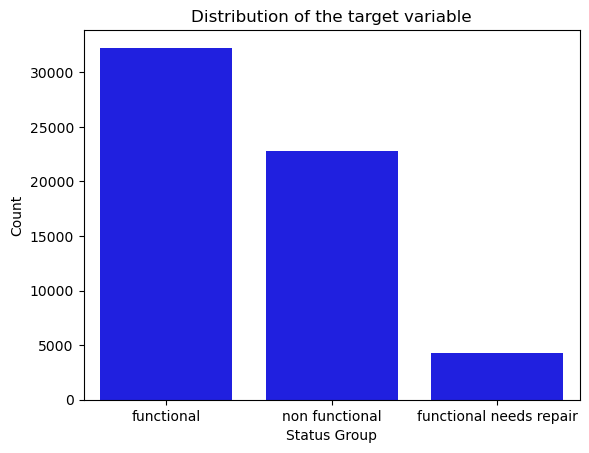

<Figure size 640x480 with 0 Axes>

In [12]:
# Plotting the distribution of the target variable
sns.countplot(x='status_group', color="blue", data=train_df)
plt.title("Distribution of the target variable")
plt.xlabel("Status Group")
plt.ylabel("Count")
plt.show()
plt.savefig("Distribution of the target variable.png");

The majority class is the functional class while the minority is the functional needs repair class

This imbalance will be handled in during the "Data Preparation" phase, before building the predictive models. This is because the class imbalance can impact the performance of the predictive models, so it's important to address it before modeling.

#### Source class

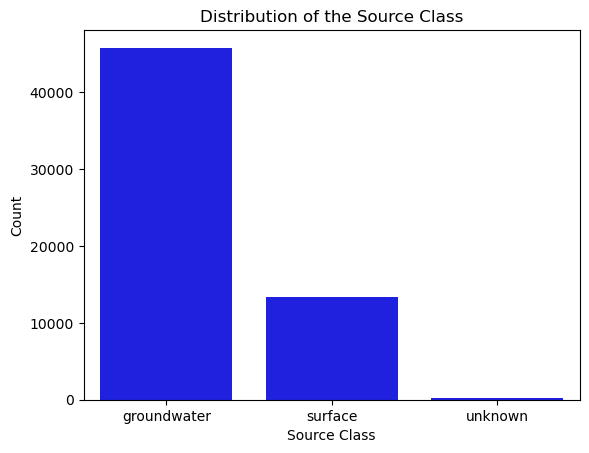

<Figure size 640x480 with 0 Axes>

In [13]:
# Plotting the distribution of the source class
sns.countplot(x='source_class', color="blue", data=train_df)
plt.title("Distribution of the Source Class")
plt.xlabel("Source Class")
plt.ylabel("Count")
plt.show()

plt.savefig("Distribution of the Source Class.png");

The source of most wells is groundwater followed by surface

#### Waterpoint Type

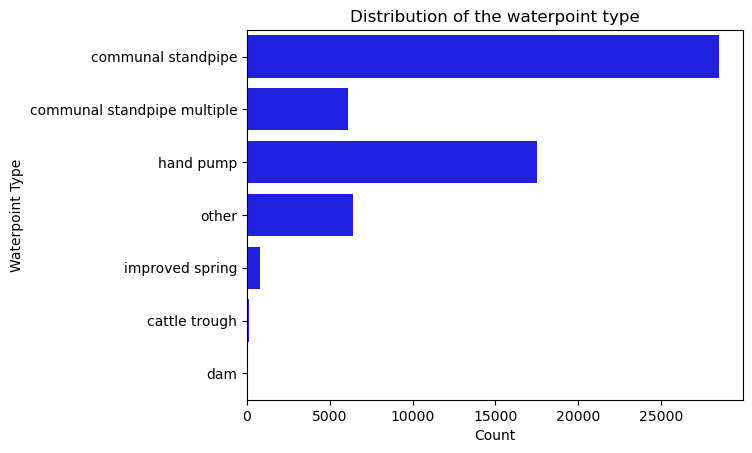

<Figure size 640x480 with 0 Axes>

In [14]:
# Plotting the distribution of the waterpoint type
sns.countplot(y='waterpoint_type', color="blue", data=train_df)
plt.title("Distribution of the waterpoint type")
plt.ylabel("Waterpoint Type")
plt.xlabel("Count")
plt.show()

plt.savefig("Distribution of the waterpoint type.png");

The type of waterpoint for most wells is the communal standpipe followed by hand pump

#### Extraction Type

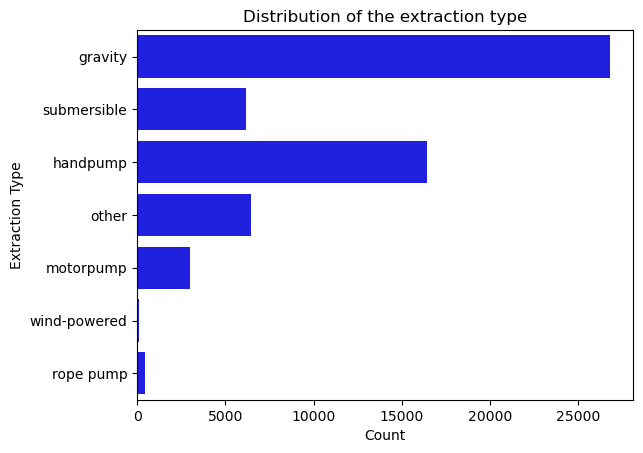

<Figure size 640x480 with 0 Axes>

In [15]:
# Plotting the distribution of the extraction type
sns.countplot(y='extraction_type_class', color="blue", data=train_df)
plt.title("Distribution of the extraction type")
plt.ylabel("Extraction Type")
plt.xlabel("Count")
plt.show()

plt.savefig("Distribution of the extraction type.png");

The extraction type for most wells is through gravity

#### Water Quality

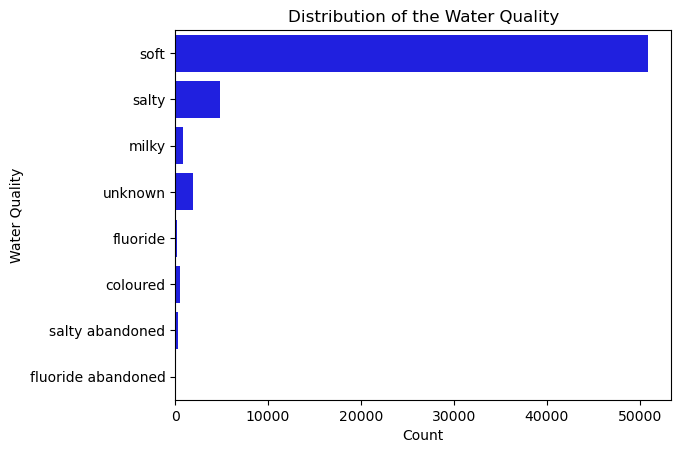

<Figure size 640x480 with 0 Axes>

In [16]:
# Plotting the distribution of the water quality
sns.countplot(y='water_quality', color="blue", data=train_df)
plt.title("Distribution of the Water Quality")
plt.ylabel("Water Quality")
plt.xlabel("Count")
plt.show()

plt.savefig("Distribution of the Water Quality.png");

The quality of water for most wells is soft water followed by salty water

#### Water Quantity

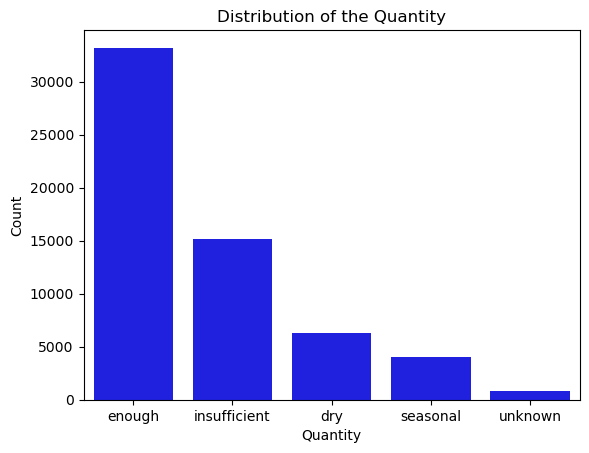

<Figure size 640x480 with 0 Axes>

In [17]:
# Plotting the distribution of the water quantity
sns.countplot(x='quantity', color="blue", data=train_df)
plt.title("Distribution of the Quantity")
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.show()


plt.savefig("Distribution of the Quantity.png");

The quantity of water in most wells is enough and a few are insufficient or dry

#### Management Type

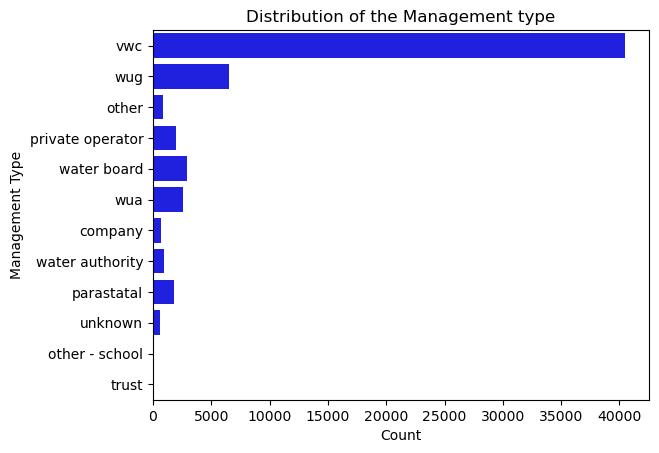

<Figure size 640x480 with 0 Axes>

In [18]:
# Plotting the distribution of the management type
sns.countplot(y='management', color="blue", data=train_df)
plt.title("Distribution of the Management type")
plt.ylabel("Management Type")
plt.xlabel("Count")
plt.show()

plt.savefig("Distribution of the Management type.png");

Most waterpoints are managed by vwc

#### Payment Type

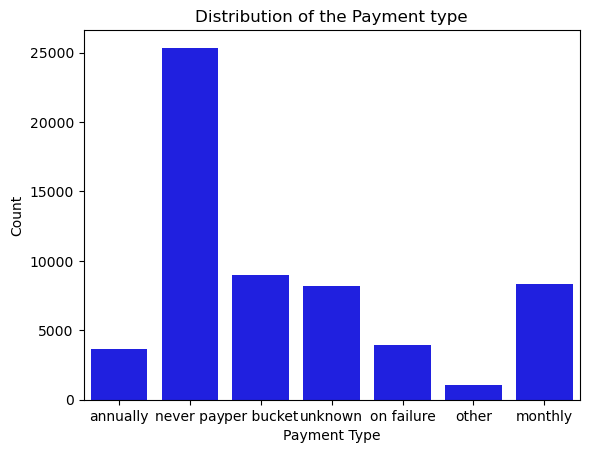

<Figure size 640x480 with 0 Axes>

In [19]:
# Plotting the distribution of the payment type
sns.countplot(x='payment_type', color="blue", data=train_df)
plt.title("Distribution of the Payment type")
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.show()

plt.savefig("Distribution of the Payment type.png");

Most waterpoints are never paid for

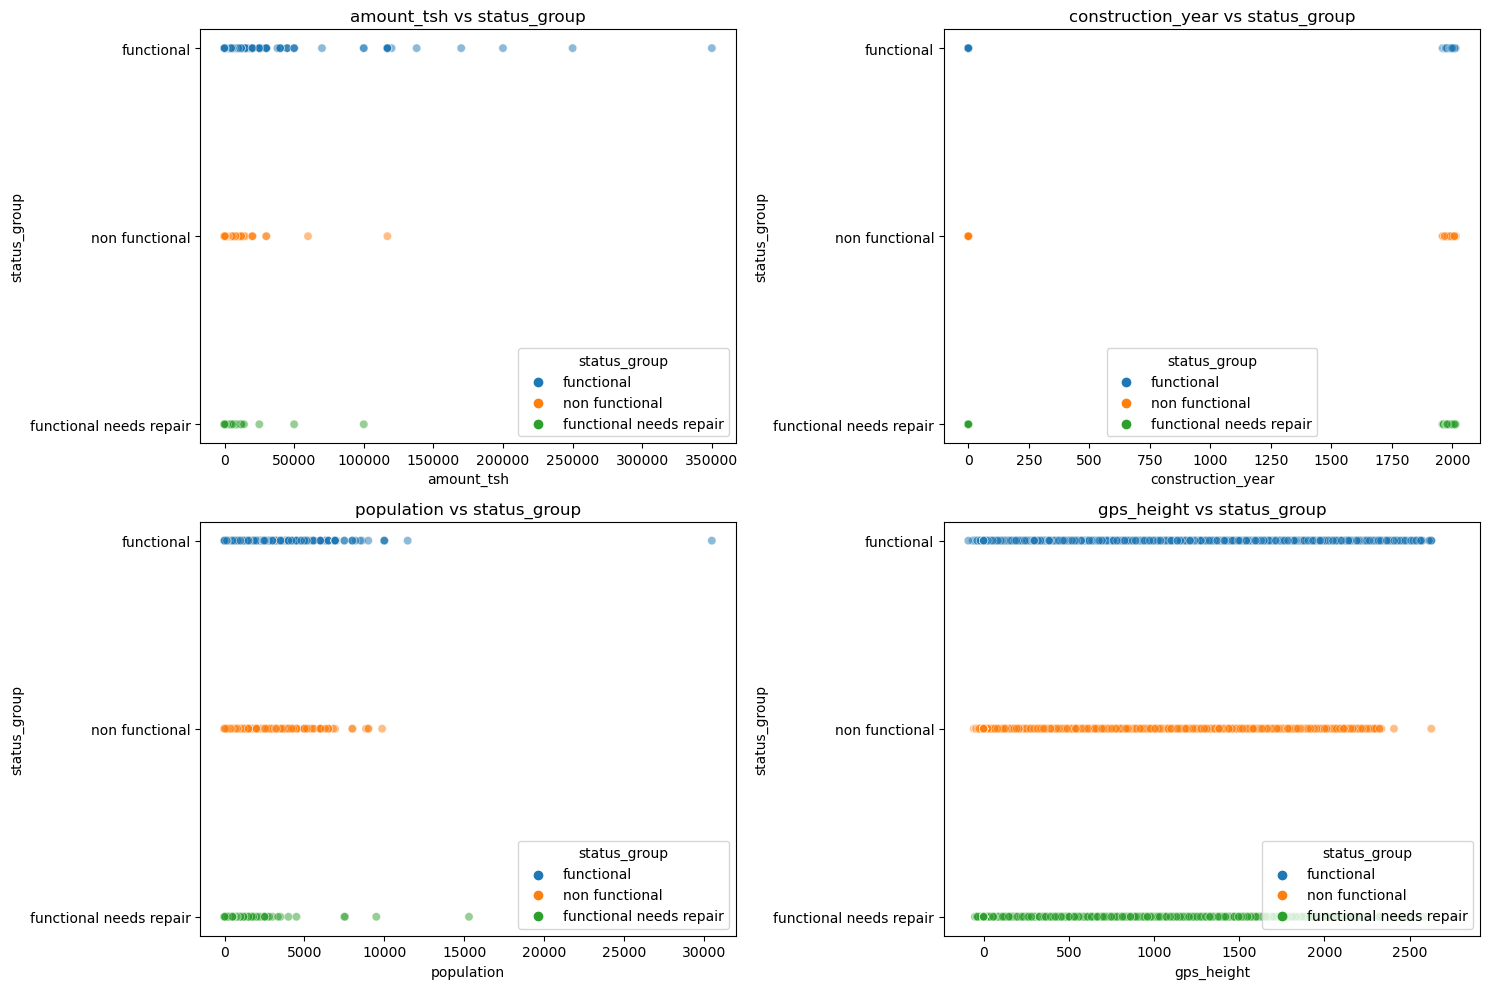

In [20]:
 #Plot scatter plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.scatterplot(x="amount_tsh", y="status_group", data=train_df, ax=axs[0, 0], alpha=0.5, hue="status_group")
axs[0, 0].set_title("amount_tsh vs status_group")

sns.scatterplot(x="construction_year", y="status_group", data=train_df, ax=axs[0, 1], alpha=0.5, hue="status_group")
axs[0, 1].set_title("construction_year vs status_group")

sns.scatterplot(x="population", y="status_group", data=train_df, ax=axs[1, 0], alpha=0.5, hue="status_group")
axs[1, 0].set_title("population vs status_group")

sns.scatterplot(x="gps_height", y="status_group", data=train_df, ax=axs[1, 1], alpha=0.5, hue="status_group")
axs[1, 1].set_title("gps_height vs status_group")

plt.tight_layout()
plt.show()

The amount of water available at the waterpoints is greater for the functional class and lowest for the non-functional class.
The population around the well is largest for the functional class and smallest for the non-functional class.
The GPS height (altitude of the well) is generally highest for the functional class among most waterpoints.

### b). Bivariate Analysis

In [6]:
# Drop the rows with 0 values for construction year
# Create a copy of the dataframe
train_df_copy = train_df.copy()
train_df_copy = train_df[train_df['construction_year'] != 0]

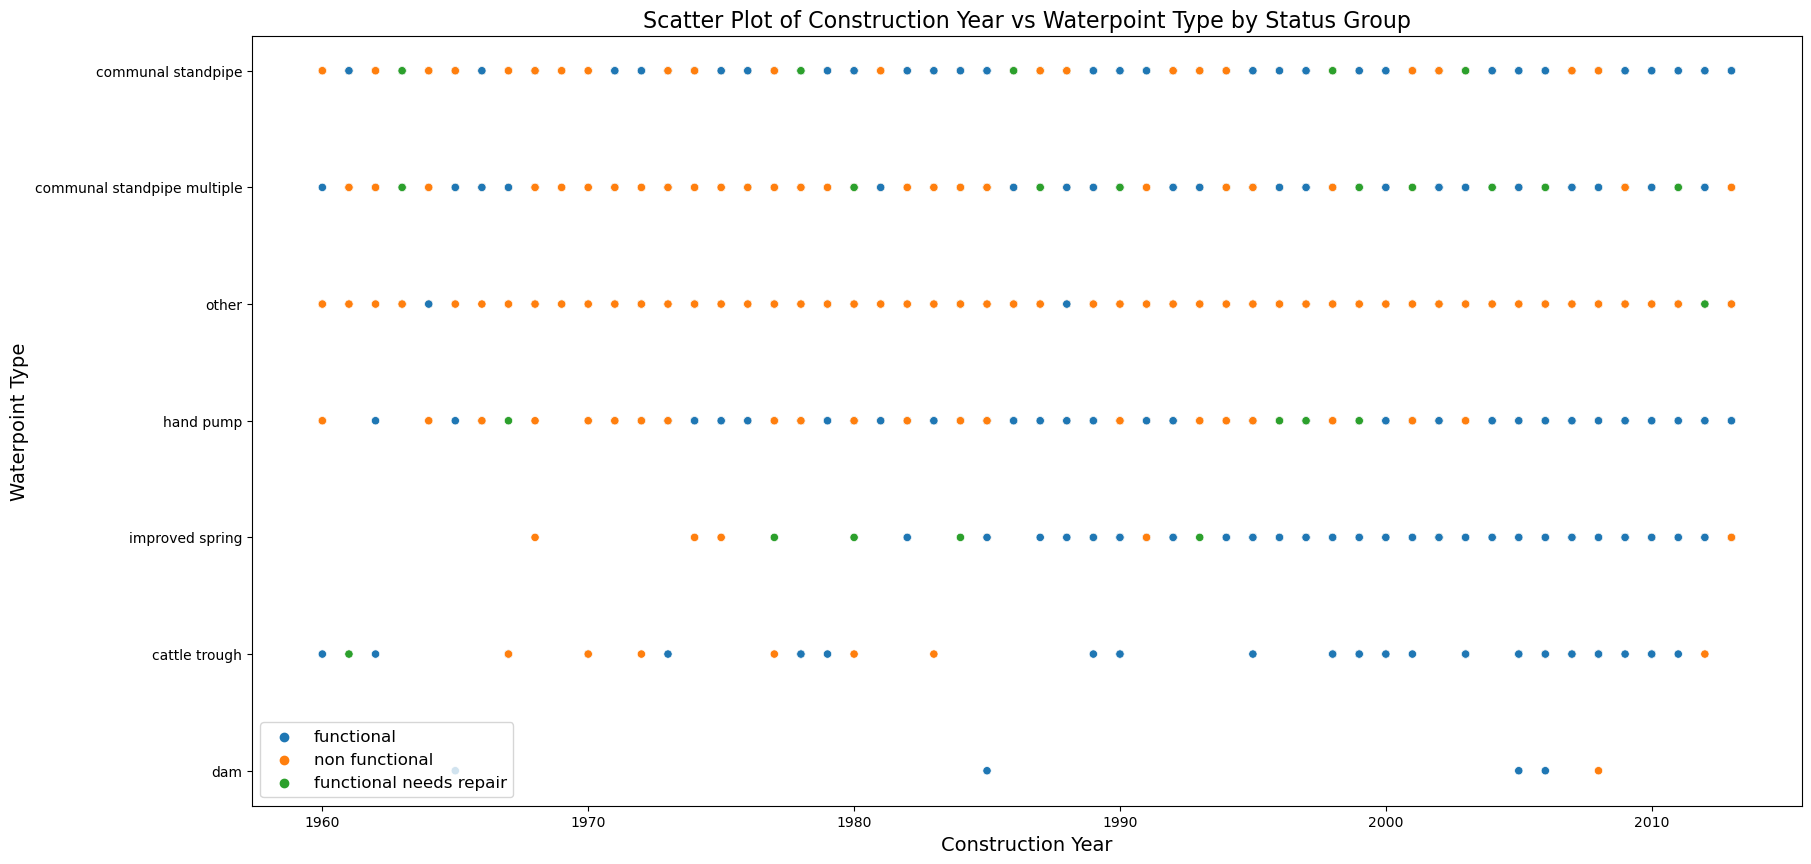

In [7]:
f, ax = plt.subplots(figsize=(20,10))
ax = sns.scatterplot(data=train_df_copy, x='construction_year', y='waterpoint_type', hue='status_group')
ax.set_xlabel('Construction Year', fontsize=14)
ax.set_ylabel('Waterpoint Type', fontsize=14)
ax.set_title('Scatter Plot of Construction Year vs Waterpoint Type by Status Group', fontsize=16)
ax.legend(fontsize=12);

f.savefig("Scatter Plot of Construction Year vs Waterpoint Type by Status Group.png");

Most functional wells are of the communal standpipe, hand pump, or improved spring type.

The majority of non-functional wells are categorized under other waterpoint types.

Wells that need repair are few in number, and their waterpoint types are spread across various categories.

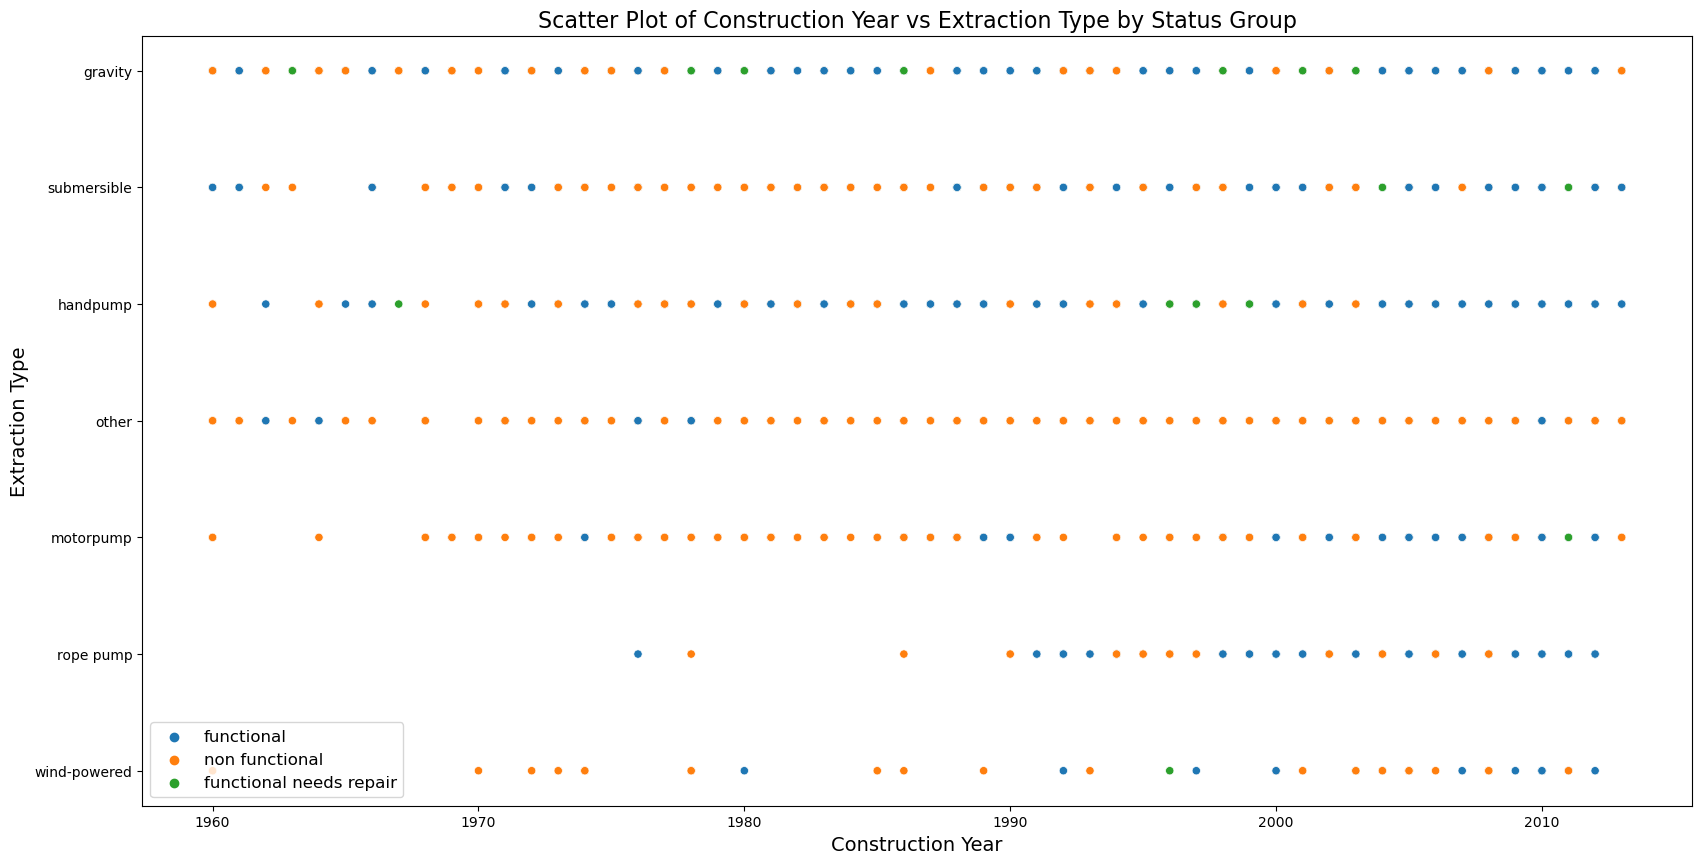

In [28]:
f, ax = plt.subplots(figsize=(20,10))
ax = sns.scatterplot(data=train_df_copy, x='construction_year', y='extraction_type_class', hue='status_group')
ax.set_xlabel('Construction Year', fontsize=14)
ax.set_ylabel('Extraction Type', fontsize=14)
ax.set_title('Scatter Plot of Construction Year vs Extraction Type by Status Group', fontsize=16)
ax.legend(fontsize=12);

f.savefig("Scatter Plot of Construction Year vs Extraction Type by Status Group.png");

The extraction type for the functional wells is mostly through gravity and handpump

The extraction type for the non functional wells is mostly through submersible, motorpumb or other methods

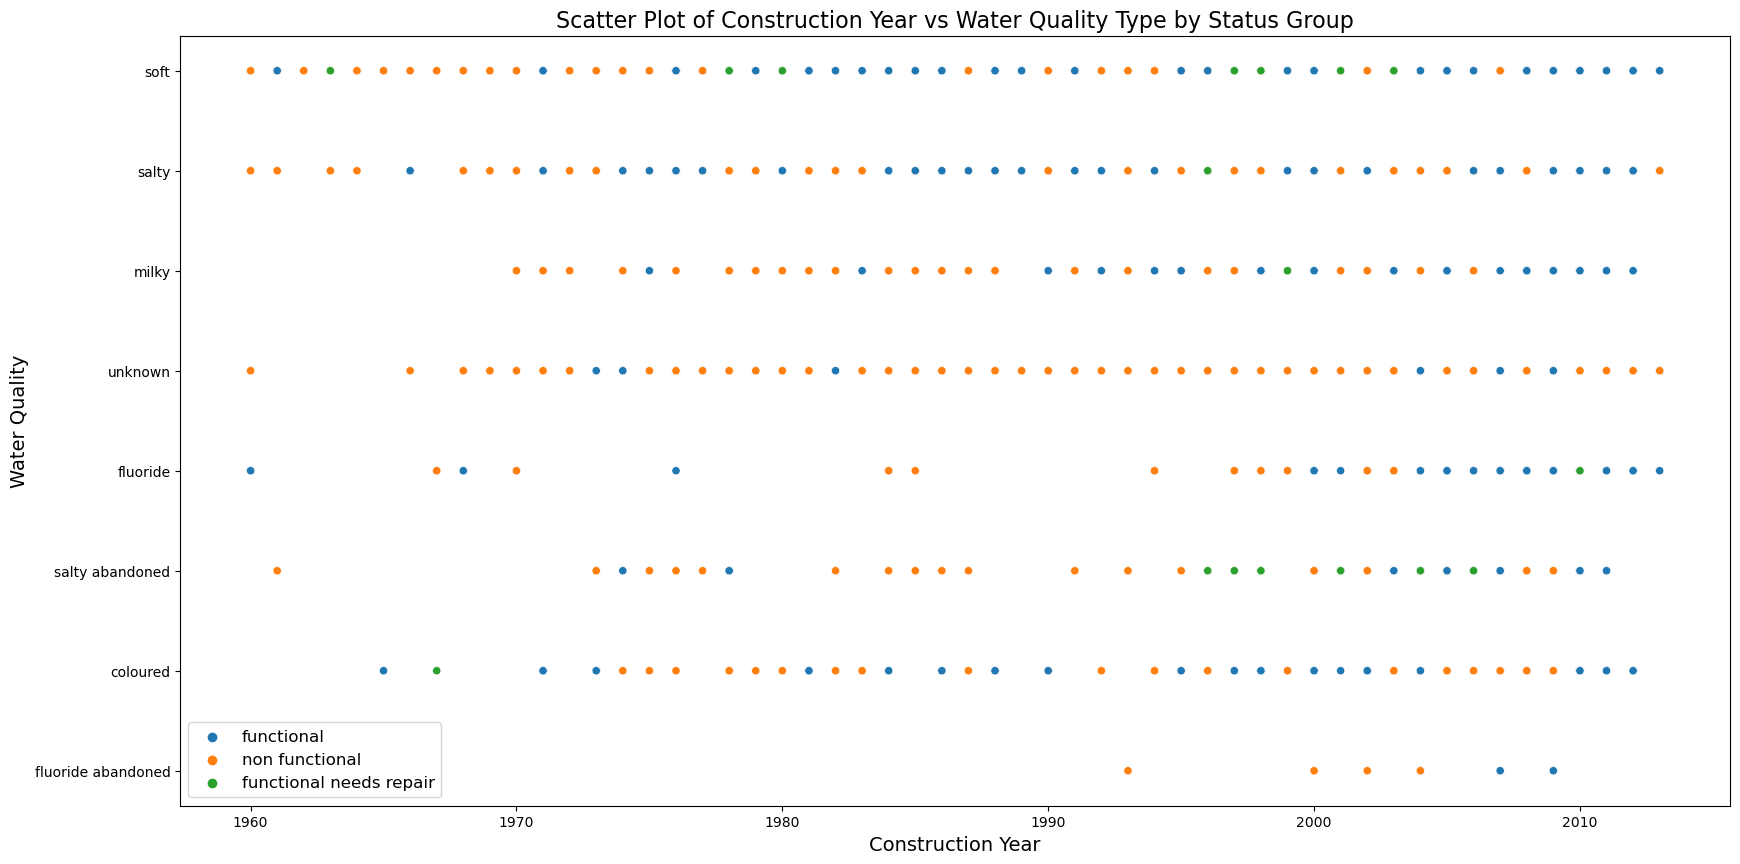

In [29]:
f, ax = plt.subplots(figsize=(20,10))
ax = sns.scatterplot(data=train_df_copy, x='construction_year', y='water_quality', hue='status_group')
ax.set_xlabel('Construction Year', fontsize=14)
ax.set_ylabel('Water Quality', fontsize=14)
ax.set_title('Scatter Plot of Construction Year vs Water Quality Type by Status Group', fontsize=16)
ax.legend(fontsize=12);

f.savefig("Scatter Plot of Construction Year vs Water Quality by Status Group.png");

The quantity of water for most of the functional wells is enough

The quantity of water for most of the non functional wells is dry

The quantity of water for the functional needs repair class is low

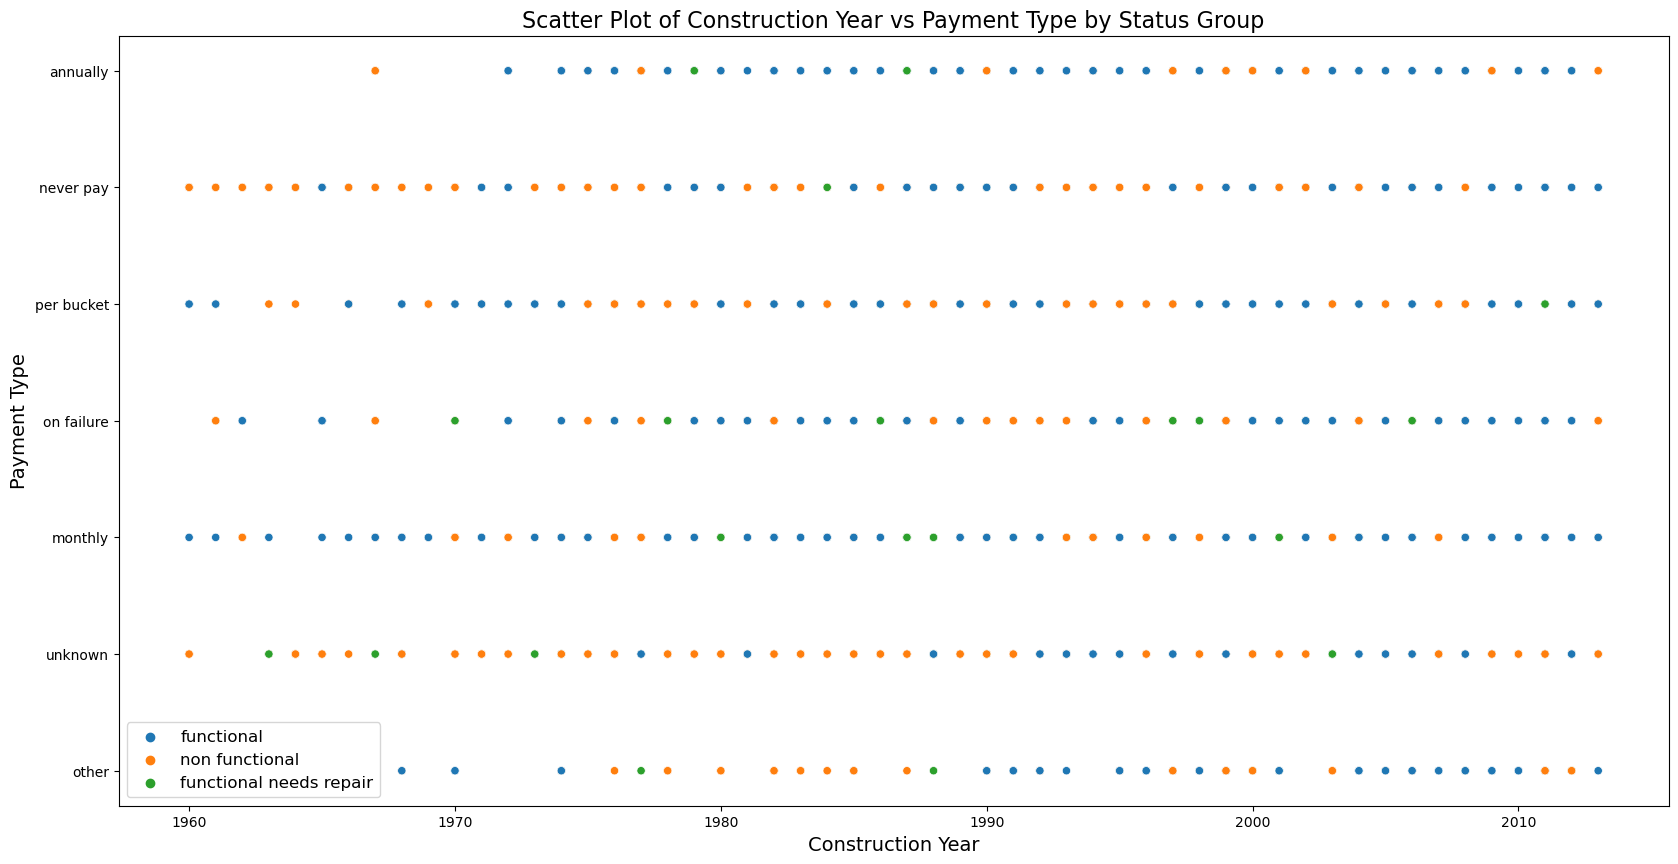

In [30]:
f, ax = plt.subplots(figsize=(20,10))
ax = sns.scatterplot(data=train_df_copy, x='construction_year', y='payment_type', hue='status_group')
ax.set_xlabel('Construction Year', fontsize=14)
ax.set_ylabel('Payment Type', fontsize=14)
ax.set_title('Scatter Plot of Construction Year vs Payment Type by Status Group', fontsize=16)
ax.legend(fontsize=12);

f.savefig("Scatter Plot of Construction Year vs Payment Type by Status Group.png");

The payment type for most of the functional class waterpoints is either monthly, annualy or per bucket

The payment type for the non fuctional class is unknown or never paid

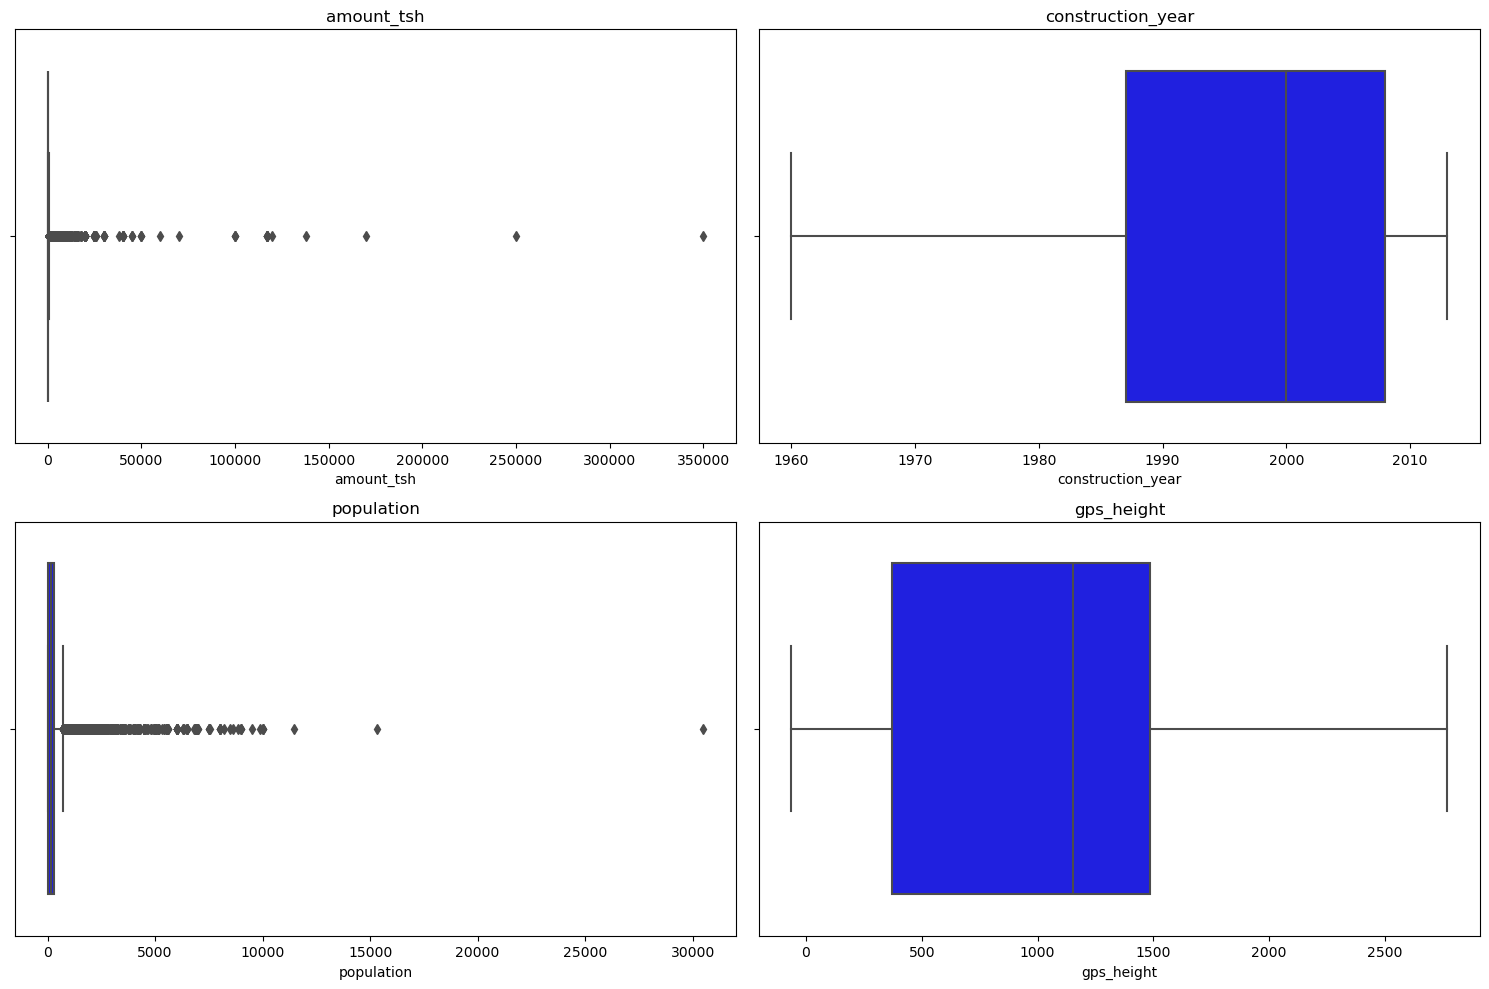

<Figure size 640x480 with 0 Axes>

In [8]:
# Outlier detection
# create a subplot with 4 box plots
numeric_cols = "amount_tsh", "construction_year", "population", "gps_height"

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# loop over the numerical columns and the subplot axis
for i, col in enumerate(numeric_cols[:6]):
    sns.boxplot(x=train_df_copy[col], color="blue", ax=axs[i//2][i%2])
    axs[i//2][i%2].set_title(col)

plt.tight_layout()
plt.show();

plt.savefig("Outliers.png");

The amount and population columns have outliers which will not be removed as this will lower the perfomance of the model

In [24]:
# Compute the correlation matrix
corr_matrix = train_df_copy.corr()

# Show the correlation matrix
# print(corr_matrix)

# Plot the correlation matrix
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(corr_matrix.corr(), dtype=bool))
sns.heatmap(corr_matrix.corr(),annot=True,cmap="Greens",fmt=".2f", mask=mask)
plt.show();

f.savefig("Correlation Matrix.png");

ValueError: could not convert string to float: 'functional'

## 3. Data Preparation

Here we perform the process of cleaning, transforming, and preprocessing the data so that it can be used in building predictive models.

In [25]:
# separate target variable and feature data
train_target = train_df['status_group']
train_features = train_df.drop('status_group', axis=1)

The target variable, train_target, contains the values of the "status_group" column. The target variable is what the machine learning model will attempt to predict.

Train_features contains the values of all columns except for "status_group." It will be used by the machine learning model to make predictions about the target variable.

By separating the target variable and feature data, it is easier to manipulate and pre-process the data before building a machine learning model.

In [26]:
# concatenate train and test features for preprocessing (to prevent data leakage)
features = pd.concat([train_features, test_df], ignore_index=True)

The code concatenates the training and test feature data into a single dataframe, features, to prevent data leakage when pre-processing the data.

Data leakage occurs when information from the test set is used to pre-process the training set, leading to overfitting. By concatenating the train and test features, any pre-processing performed on the combined dataframe will not use information from the test set, preventing data leakage

### 3.1 Handling Missing values

In [27]:
# fill missing values in the scheme_name column with None
features['scheme_name'] = features['scheme_name'].fillna(value='None')

features['permit'] = features['permit'].fillna(value='FALSE')

features['public_meeting'] = features['public_meeting'].fillna(value='FALSE')

The first line fills missing values in the scheme_name column with the value "None.". By imputing a value for missing entries, we can ensure that all values in the column are non-missing, which is necessary for building a machine learning model.The second and third lines fill missing values in the permit and public_meeting columns with the value "FALSE." This is because the data in these columns is binary and missing values are being treated as "False" values.

In [28]:
# Understanding the number of missing values in the clea dataset
print("\nMissing Values in the dataset:")
features = pd.DataFrame(features)
print(features.isnull().sum().sum(), "missing values in the dataset")


Missing Values in the dataset:
14358 missing values in the dataset


### 3.2 Feature Selection


In [40]:
features = features.drop(['id','num_private','subvillage','extraction_type','recorded_by','payment','quality_group',
                          'source','waterpoint_type_group', 'scheme_management'], axis=1)

KeyError: "['id', 'num_private', 'subvillage', 'extraction_type', 'recorded_by', 'payment', 'quality_group', 'source', 'waterpoint_type_group', 'scheme_management'] not found in axis"

In [32]:
column_names = features.columns
print(column_names)

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'basin', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'scheme_name', 'permit', 'construction_year', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group',
       'payment_type', 'water_quality', 'quantity', 'quantity_group',
       'source_type', 'source_class', 'waterpoint_type'],
      dtype='object')
